In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
# Read in the Boston housing data.
from sklearn.datasets import load_boston
housing = pd.read_csv('../Data-Science-GA-SF-59/lessons/required/data-visualization/data/boston_housing_data.csv')
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['med_val'] = boston.target

In [3]:
#Establishing graphing parameters
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 14

## Data Exploration

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Questions to address:
#Which features most correlate to med_val?
#can we predict med_val?

In [5]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,med_val
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,med_val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
med_val    0
dtype: int64

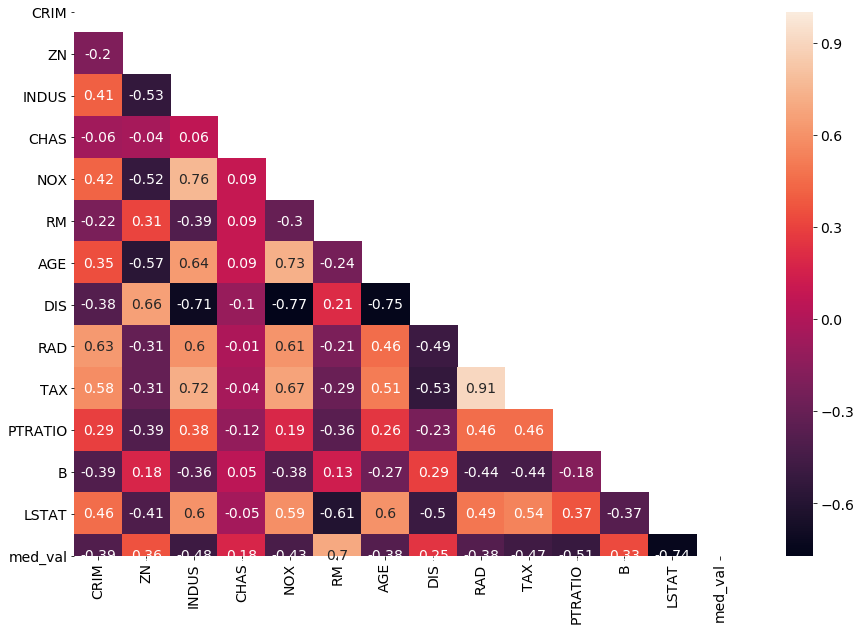

In [8]:
corr = df.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, annot=True, mask=mask, ax=ax)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [9]:
corr['med_val'].sort_values()
#I'll use features: LSTAT, PTRATIO, RM, ZN

LSTAT     -0.74
PTRATIO   -0.51
INDUS     -0.48
TAX       -0.47
NOX       -0.43
CRIM      -0.39
AGE       -0.38
RAD       -0.38
CHAS       0.18
DIS        0.25
B          0.33
ZN         0.36
RM         0.70
med_val    1.00
Name: med_val, dtype: float64

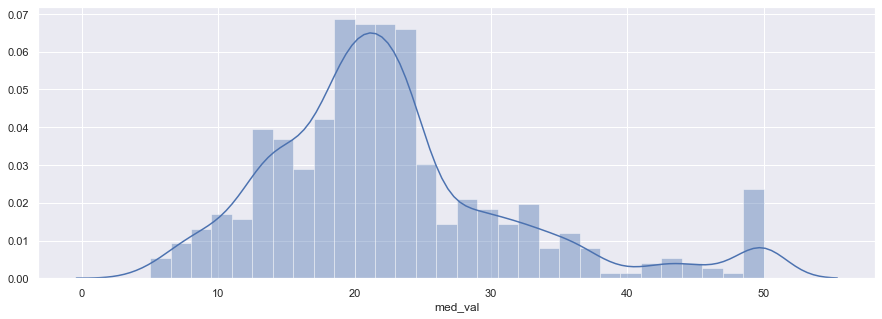

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
sns.distplot(df['med_val'], bins=30)
plt.show()

## Modeling (Linear Regression using all features)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
X = df[df.columns.drop(['med_val'])]
y = df['med_val']

In [23]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [31]:
lr_mod = LinearRegression()
lr_mod.fit(X, y)
lr_preds = lr_mod.predict(X)

In [32]:
coef = pd.DataFrame(df.columns.drop(['med_val']), columns = ['features'])
coef['coef'] = pd.Series(lr_mod.coef_)
coef

,features,coef
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [33]:
lr_mod.score(X,y)
#baseline accuracy score .741

0.7406426641094095

In [34]:
metrics.mean_squared_error(y, lr_preds)

21.894831181729202

## Modeling (Linear Regression with Target Features)

In [35]:
X = df[['ZN','RM','LSTAT','PTRATIO']]
y = df['med_val']

In [36]:
print(X.shape)
print(y.shape)

(506, 4)
(506,)


In [37]:
lr_mod = LinearRegression()
lr_mod.fit(X, y)
lr_preds = lr_mod.predict(X)

In [38]:
lr_mod.score(X,y)
#baseline score is .679

0.6789744677198571

In [52]:
metrics.mean_squared_error(y, lr_preds)

27.100832949886456

In [51]:
coef = pd.DataFrame(df[['ZN','RM','LSTAT','PTRATIO']].columns, columns = ['features'])
coef['coef'] = pd.Series(lr_mod.coef_)
coef

,features,coef
0,ZN,-0.008449
1,RM,4.526442
2,LSTAT,-0.579749
3,PTRATIO,-0.955301


## Train-test split

In [71]:
X = df[['ZN','RM','LSTAT','PTRATIO']]
y = df['med_val']

#70/30 Train - test split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .2, random_state = 421)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


In [72]:
lr_mod = LinearRegression()
lr_mod.fit(X_train, y_train)
lr_pred = lr_mod.predict(X_test)

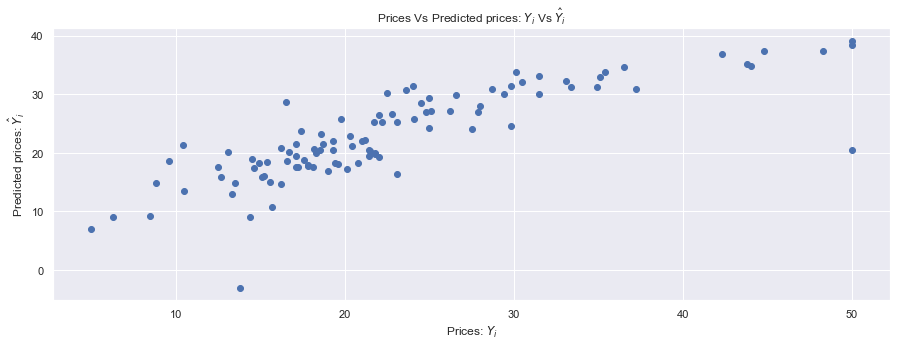

In [73]:
#plot predicted prices vs actuals
plt.scatter(y_test, lr_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [74]:
#better than baseline?
lr_mod.score(X_test, y_test)

0.6753571559877042

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 3.760031368732312
Mean Squared Error: 30.22672010715313
Root Mean Squared Error: 5.4978832387704575


## Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_mod, X_train, y_train, cv=5)

array([0.737392  , 0.70088039, 0.51172559, 0.72255274, 0.7002127 ])

In [68]:
cv_df = pd.DataFrame()
def cv_scores(model, X, y, cv):
    for cv_count in range(5,cv+1):
        cv_df[cv_count] = pd.Series(cross_val_score(model, X, y, cv=cv_count)).describe()
    return cv_df

In [69]:
cv_scores(lr_mod, X_train, y_train, cv=10)
#seems like less k-folds leads to better scores

,5,6,7,8,9,10
count,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
mean,0.674553,0.676224,0.665786,0.672404,0.667110,0.680300
std,0.092354,0.123338,0.114894,0.120918,0.143305,0.129181
min,0.511726,0.437261,0.484579,0.427503,0.359893,0.404783
25%,0.700213,0.684974,0.597216,0.632447,0.640766,0.624875
50%,0.700880,0.708035,0.699295,0.692702,0.709847,0.687934
75%,0.722553,0.727000,0.741780,0.744225,0.763162,0.773627
max,0.737392,0.793406,0.798633,0.814161,0.823006,0.847863


## Modeling (KNN)

## RandomForrest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [ ]:
print(sklearn.metrics.mean_absolute_error(Y_test, y_pred))
print(np.sqrt(mse))

In [ ]:
print(rf.score(X_test , y_test))

In [ ]:
sns.distplot(y_pred)

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(y_test , y_pred)
spearman = spearmanr(y_test, y_pred)
pearson = pearsonr(y_test, y_pred)
print("Out of Bag R2 Score" , rf.oob_score_)
print("Test Data R2 Score:" , test_score)
print("Test Data Spearman Correlation:" ,  round(spearman[0], 3))
print("Test Data Pearson Correlation" , round(pearson[0],3))

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [ ]:
#ZN vs INDUS scatter plot
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

In [ ]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']]);